In [1]:

API_SECRET_SANDBOX="xxxx"
API_KEY_SANDBOX="xxx"
API_PASS_SANDBOX="xxx"


import cbpro
auth_client = cbpro.AuthenticatedClient(API_KEY_SANDBOX, API_SECRET_SANDBOX, API_PASS_SANDBOX,
                                  api_url="https://api-public.sandbox.pro.coinbase.com")

In [256]:
#SNX-BTC PUEDE ESTAR GUACHI, HAY QUE PROBAR

dinero = auth_client.get_accounts()[1]["balance"]
portfolio = auth_client.get_accounts()[2]["balance"]
a= auth_client.get_product_historic_rates('ETH-BTC', granularity=300)
ad=pd.DataFrame(a[0:30])
ad.columns= ["time","low","high","open","close","volume"]
ad["time"] = pd.to_datetime(ad["time"],unit='s')

ad.set_index("time",inplace=True)
dataclose=list(ad["close"])[::-1]
datavol=list(ad["volume"])[::-1]
precio=dataclose[-1]
print(str(dinero)+" "+str(portfolio)+" "+str(precio))
print(float(dinero)/precio)
import math
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

a=auth_client.sell(price=str(precio), #BTC
               size=str(truncate(float(portfolio*1)*0.9,2)),
               order_type='limit',
               product_id='ETH-BTC')
print(a)

0.0007233373245000 0.0017400000000000 0.04133
0.017501507972417132
{'message': 'size is too small. Minimum size is 0.01000000'}


In [254]:
auth_client.sell(price=str(precio), #BTC
               size=str(acciones), #ETH
               order_type='limit',
               product_id='ETH-BTC')

NameError: name 'acciones' is not defined

In [141]:
import matplotlib.pyplot as plt
import pandas as pd
from time import sleep
from datetime import datetime, timedelta
from IPython.display import clear_output



data=pd.DataFrame()
for i in range(dias):
    if i==dias-1:
        clear_output(wait=True)
        print(("■"*10)+"   "+str(i)+"/"+str(dias), flush=True)
    #elif i%(dias*0.01)==0:
    elif 0==0:
        clear_output(wait=True)
        print("■"*int(((i*10)//dias))+"□"*int((10-((i*10)//dias)))+"   "+str(i)+"/"+str(dias), flush=True)
    date = datetime.now()
    date = date-timedelta(days=12*i)
    dateayer = date-timedelta(days=12)
    a= auth_client.get_product_historic_rates('ETH-BTC', granularity=300,start=dateayer.isoformat(),end=date.isoformat())
    ad=pd.DataFrame(a)
    ad.columns= ["time","low","high","open","close","volume"]
    ad["time"] = pd.to_datetime(ad["time"],unit='s')
    sleep(1)
    ad.set_index("time",inplace=True)
    data=data.append(ad)

□□□□□□□□□□   10/730


ValueError: Length mismatch: Expected axis has 0 elements, new values have 6 elements

In [233]:
from datetime import datetime, timedelta

a= auth_client.get_product_historic_rates('ETH-BTC', granularity=300)
ad=pd.DataFrame(a[0:11])
ad.columns= ["time","low","high","open","close","volume"]
ad["time"] = pd.to_datetime(ad["time"],unit='s')

ad.set_index("time",inplace=True)
dataclose=list(ad["close"])[::-1]
datavolume=list(ad["volume"])[::-1]
print(ad)

                         low     high     open    close    volume
time                                                             
2021-02-07 17:55:00  0.04106  0.04114  0.04108  0.04112  0.120000
2021-02-07 17:50:00  0.04103  0.04110  0.04106  0.04107  0.580000
2021-02-07 17:45:00  0.04103  0.04120  0.04120  0.04103  0.580000
2021-02-07 17:40:00  0.04114  0.04124  0.04123  0.04121  0.644188
2021-02-07 17:35:00  0.04116  0.04129  0.04124  0.04116  0.688416
2021-02-07 17:30:00  0.04108  0.04121  0.04121  0.04118  0.634211
2021-02-07 17:25:00  0.04113  0.04126  0.04126  0.04119  0.580000
2021-02-07 17:20:00  0.04103  0.04126  0.04108  0.04124  0.590000
2021-02-07 17:15:00  0.04102  0.04113  0.04105  0.04106  6.988002
2021-02-07 17:10:00  0.04090  0.04109  0.04092  0.04103  0.590000
2021-02-07 17:05:00  0.04084  0.04104  0.04088  0.04093  0.590000


In [144]:
print(data)

                         low     high     open    close      volume
time                                                               
2021-02-06 18:00:00  0.04193  0.04555  0.04242  0.04209    5.776261
2021-02-06 17:00:00  0.04157  0.04239  0.04172  0.04239    7.167502
2021-02-06 16:00:00  0.04061  0.04555  0.04092  0.04171   13.319547
2021-02-06 15:00:00  0.04092  0.04555  0.04187  0.04094    7.152325
2021-02-06 14:00:00  0.04162  0.04202  0.04174  0.04189    7.221642
...                      ...      ...      ...      ...         ...
2020-10-18 13:00:00  0.03264  0.03271  0.03269  0.03269    1.623802
2020-10-18 12:00:00  0.03261  0.03271  0.03264  0.03271    1.180000
2020-10-18 11:00:00  0.03261  0.03990  0.03707  0.03266  326.199669
2020-10-17 03:00:00  0.03707  0.09760  0.09760  0.03990    0.030000
2020-10-12 21:00:00  0.07000  0.09500  0.07000  0.09500    1.010000

[1596 rows x 5 columns]


In [155]:
data.to_csv("datosETH.BTC5m.csv")

In [ ]:
import pandas as pd
data = pd.read_csv("datosETH.BTC.csv")

In [44]:
auth_client.buy(price='0.045', #BTC
               size='1', #ETH
               order_type='limit',
               product_id='ETH-BTC')

{'id': 'd47a3cdc-4ff3-4794-ab3d-a18445ab1d75',
 'price': '0.045',
 'size': '1',
 'product_id': 'ETH-BTC',
 'side': 'buy',
 'stp': 'dc',
 'type': 'limit',
 'time_in_force': 'GTC',
 'post_only': False,
 'created_at': '2021-02-06T22:41:45.274725Z',
 'fill_fees': '0',
 'filled_size': '0',
 'executed_value': '0',
 'status': 'pending',
 'settled': False}

In [45]:
public_client.get_products()

[{'id': 'CGLD-EUR',
  'base_currency': 'CGLD',
  'quote_currency': 'EUR',
  'base_min_size': '0.10000000',
  'base_max_size': '34000.00000000',
  'quote_increment': '0.00010000',
  'base_increment': '0.01000000',
  'display_name': 'CGLD/EUR',
  'min_market_funds': '1.0',
  'max_market_funds': '100000',
  'margin_enabled': False,
  'post_only': False,
  'limit_only': False,
  'cancel_only': False,
  'trading_disabled': False,
  'status': 'online',
  'status_message': ''},
 {'id': 'BNT-BTC',
  'base_currency': 'BNT',
  'quote_currency': 'BTC',
  'base_min_size': '1.00000000',
  'base_max_size': '95000.00000000',
  'quote_increment': '0.00000001',
  'base_increment': '1.00000000',
  'display_name': 'BNT/BTC',
  'min_market_funds': '0.0001',
  'max_market_funds': '5.1',
  'margin_enabled': False,
  'post_only': False,
  'limit_only': False,
  'cancel_only': False,
  'trading_disabled': False,
  'status': 'online',
  'status_message': ''},
 {'id': 'DASH-BTC',
  'base_currency': 'DASH',
  'q

In [152]:
from Historic_Crypto import HistoricalData
data = HistoricalData('ETH-BTC',300,'2020-02-07-00-00').retrieve_data()
print(data)

Checking input parameters are in the correct format...
Formatting Dates...
Checking if ticker supplied is available on the CoinBase Pro API...
Connected to the CoinBase Pro API...
Ticker 'ETH-BTC' found at the CoinBase Pro API, continuing to extraction...
Data for chunk 0 of 351 extracted
Data for chunk 1 of 351 extracted
Data for chunk 2 of 351 extracted
Data for chunk 3 of 351 extracted
Data for chunk 4 of 351 extracted
Data for chunk 5 of 351 extracted
Data for chunk 6 of 351 extracted
Data for chunk 7 of 351 extracted
Data for chunk 8 of 351 extracted
Data for chunk 9 of 351 extracted
Data for chunk 10 of 351 extracted
Data for chunk 11 of 351 extracted
Data for chunk 12 of 351 extracted
Data for chunk 13 of 351 extracted
Data for chunk 14 of 351 extracted
Data for chunk 15 of 351 extracted
Data for chunk 16 of 351 extracted
Data for chunk 17 of 351 extracted
Data for chunk 18 of 351 extracted
Data for chunk 19 of 351 extracted
Data for chunk 20 of 351 extracted
Data for chunk 21 o

Data for chunk 224 of 351 extracted
Data for chunk 225 of 351 extracted
Data for chunk 226 of 351 extracted
Data for chunk 227 of 351 extracted
Data for chunk 228 of 351 extracted
Data for chunk 229 of 351 extracted
Data for chunk 230 of 351 extracted
Data for chunk 231 of 351 extracted
Data for chunk 232 of 351 extracted
Data for chunk 233 of 351 extracted
Data for chunk 234 of 351 extracted
Data for chunk 235 of 351 extracted
Data for chunk 236 of 351 extracted
Data for chunk 237 of 351 extracted
Data for chunk 238 of 351 extracted
Data for chunk 239 of 351 extracted
Data for chunk 240 of 351 extracted
Data for chunk 241 of 351 extracted
Data for chunk 242 of 351 extracted
Data for chunk 243 of 351 extracted
Data for chunk 244 of 351 extracted
Data for chunk 245 of 351 extracted
Data for chunk 246 of 351 extracted
Data for chunk 247 of 351 extracted
Data for chunk 248 of 351 extracted
Data for chunk 249 of 351 extracted
Data for chunk 250 of 351 extracted
Data for chunk 251 of 351 ex

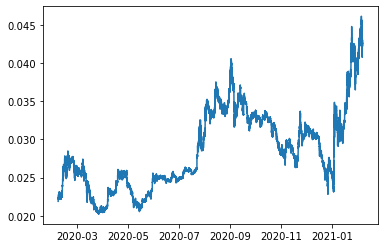

In [156]:
plt.plot(data["close"])

In [157]:
data

,low,high,open,close,volume
time,,,,,
2020-02-07 00:05:00,0.02186,0.02189,0.02187,0.02188,15.922641
2020-02-07 00:10:00,0.02191,0.02194,0.02191,0.02192,3.300343
2020-02-07 00:15:00,0.02191,0.02195,0.02193,0.02194,88.327171
2020-02-07 00:20:00,0.02193,0.02198,0.02195,0.02198,50.471752
2020-02-07 00:25:00,0.02198,0.02206,0.02198,0.02203,457.668288
...,...,...,...,...,...
2021-02-07 01:25:00,0.04247,0.04260,0.04258,0.04254,111.529175
2021-02-07 01:30:00,0.04252,0.04260,0.04256,0.04253,73.206711
2021-02-07 01:35:00,0.04243,0.04257,0.04255,0.04244,105.455067


In [14]:
len(list(auth_client.get_orders()))

0

In [13]:
a

[]